In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
from scipy.stats import zscore, ttest_ind, mannwhitneyu

nsub = 99
PCI_S_all = np.zeros((nsub,49))
PCI_W_all = np.zeros((nsub,49))
iterate= np.arange(0,nsub,1)
F0=np.arange(0.01,0.5,0.01)

for i,t in enumerate(iterate):
    sub = i+1
    path = 'Fo_relation_N3\PCI\PCI_S_%s.mat'%sub;
    PCI_S_val = loadmat(path)['PCI_S'];
    
    path = 'Fo_relation_W\PCI\PCI_W_%s.mat'%sub;
    PCI_W_val = loadmat(path)['PCI_W'];

    PCI_S_all[i,:] = PCI_S_val;
    PCI_W_all[i,:] = PCI_W_val;
    

In [19]:
#Remove the outliers
S_list = []
W_list = []
iterate= np.arange(0,49,1)
for i,t in enumerate(iterate):
    S = np.delete(PCI_S_all[:,i], np.where(abs(zscore(PCI_S_all[:,i])) > 3))
    S_list.append(list(S))
    W = np.delete(PCI_W_all[:,i], np.where(abs(zscore(PCI_W_all[:,i])) > 3))
    W_list.append(list(W))

In [20]:
PCI_S_mean = np.zeros(49)
PCI_W_mean = np.zeros(49)
for i,t in enumerate(S_list):
    PCI_S_mean[i] = np.median(S_list[i])
    PCI_W_mean[i] = np.median(W_list[i])

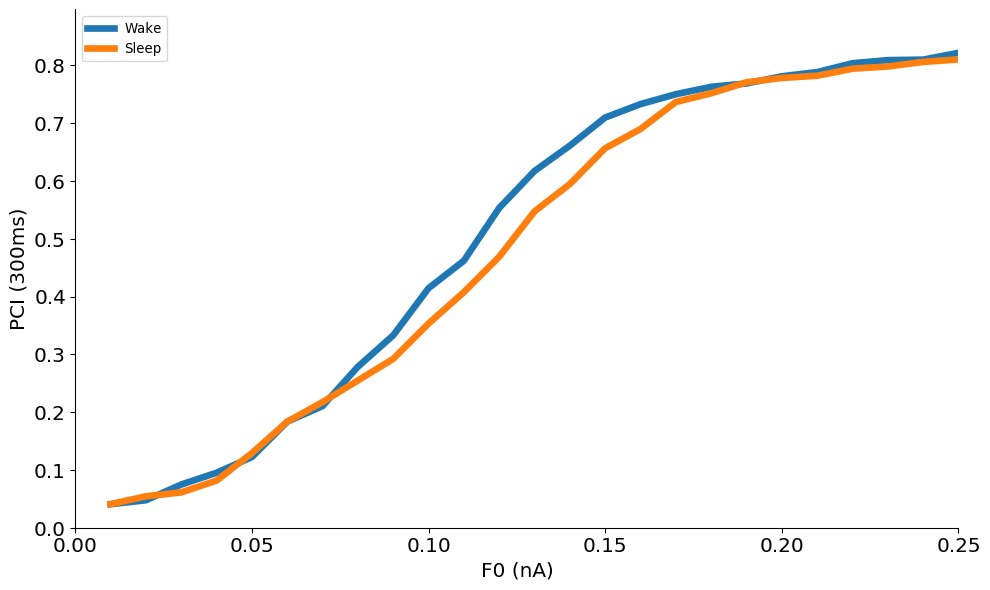

In [21]:
hfont = {'fontname':'Helvetica'}
my_dpi= 96

fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)
axs.plot(F0,PCI_W_mean, label = 'Wake',linewidth=5)
axs.plot(F0,PCI_S_mean, label = 'Sleep',linewidth=5)
axs.set_xlabel('F0 (nA)',fontsize=15)
axs.tick_params(axis="x", labelsize=15)
axs.set_ylabel('PCI (300ms)',fontsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_xlim((0,0.25))
axs.legend(loc='best')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
fig.tight_layout()

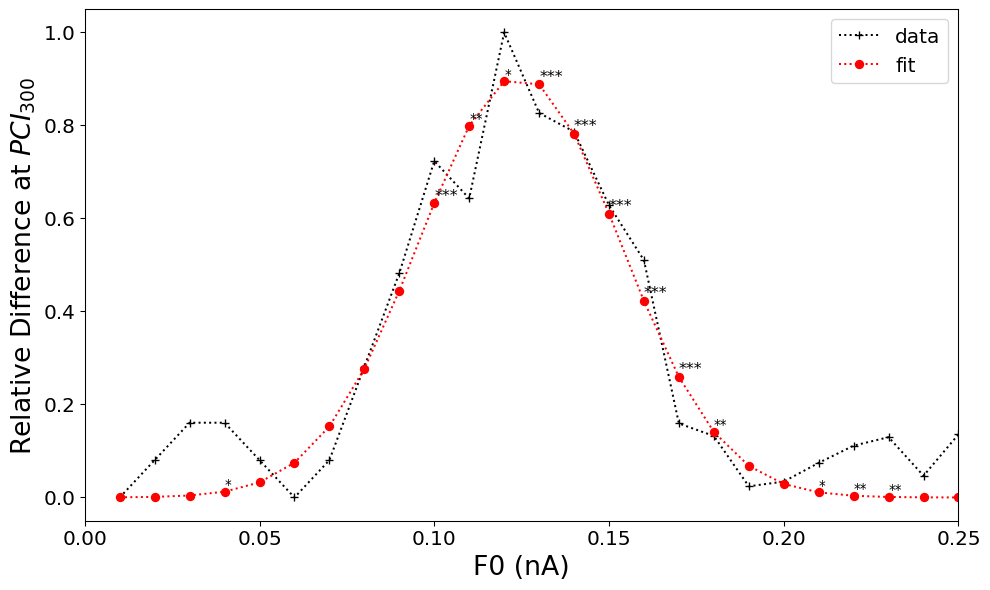

In [22]:
from scipy.optimize import curve_fit

x = np.arange(0.01,0.5,0.01)
y = abs(PCI_W_mean-PCI_S_mean)
y=y/y.max()

n = len(F0)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
my_dpi = 96
fig,axs = plt.subplots(1, figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)
    
axs.plot(x,y,'b+:',label='data',color='k')
axs.plot(x,gaus(x,*popt),'ro:',label='fit')
for i in range(0,24): 
    t,p_val = mannwhitneyu(W_list[i],S_list[i])
    if p_val < 0.001:
        axs.text(x[i],gaus(x[i],*popt),'***',fontsize ='large',verticalalignment='bottom')
    elif p_val < 0.01:
        axs.text(x[i],gaus(x[i],*popt),'**',verticalalignment='bottom')
    elif p_val <0.05:
        axs.text(x[i],gaus(x[i],*popt),'*',verticalalignment='bottom')
axs.legend(loc='best',prop={'size': 15})
axs.set_xlabel('F0 (nA)',fontsize=20)
axs.tick_params(axis='x', labelsize=15)
axs.set_xlim(0,0.25)
axs.set_ylabel('Relative Difference at $PCI_{300}$',fontsize=20)
axs.tick_params(axis="y", direction='out', top ='off',labelsize=15)
#axs.spines['right'].set_visible(False)
#axs.spines['top'].set_visible(False)
fig.tight_layout()